In [2]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as m
from matplotlib import pyplot as plt

%matplotlib inline

pt_per_inch = 72
size = 1000 / pt_per_inch;
height = 0.5


# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

19 (10040.709833867979-114.47562750642156j)
11.149122807017543


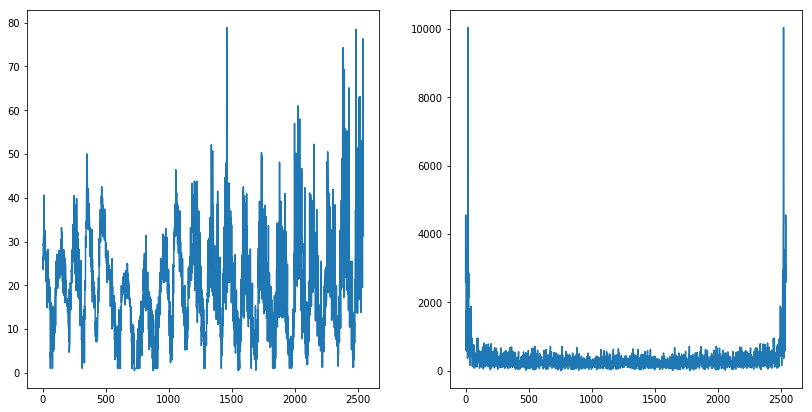

In [3]:
array=[float(x) for x in open('spots.txt').read().split()]
x = max(array)
p=fft(array)
s=p[1::]
y=argmax(s)
print(y+1, s[y])
print((1/((y+1)/len(p))*1)/12)

fig = plt.figure(1, figsize=(size, height * size))
sub = fig.add_subplot(1, 2, 1)
sub.plot(array)

sub = fig.add_subplot(1, 2, 2)
sub.plot(abs(s))

plt.show()

# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

F:\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


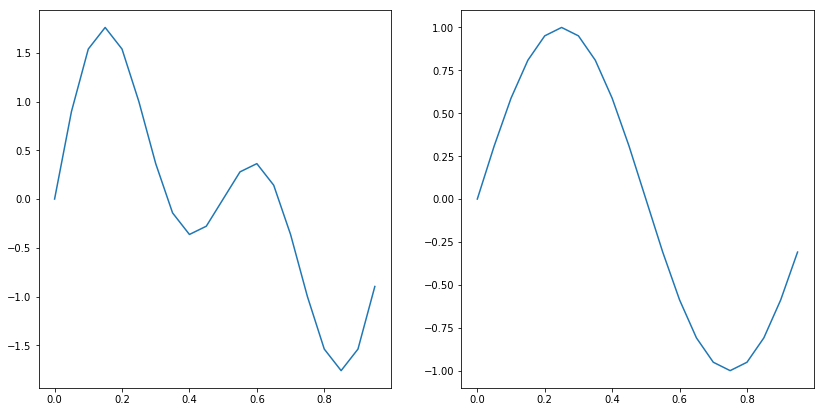

In [43]:
w = 20
TW = 1.0/w 
T=1

t = np.arange(0, T, TW)

freqs = range(int(len(t)))

f = lambda t : (sin(2*pi*t)+sin(4*pi*t))  
x = f(t) 

y = fft(x)

y[2]=0
y[-2]=0
z=ifft(y)

fig = plt.figure(1, figsize=(size, height * size))
sub = fig.add_subplot(1, 2, 1)
sub.plot(t, x)

sub = fig.add_subplot(1, 2, 2)
sub.plot(t, z)

plt.show()

# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

[1.2246467991473532e-16, -1.0, -1.0, 0.6079292634517692, -0.19961314540158612, -0.7639436199766917, -0.992582103928079, -0.9218373679612417, -0.9179065805530272, -0.7992305077706577, 0.998746101346253, 0.8824723596543186, 0.9179065805530272, -0.2820836010108341, 0.0, -0.8910918472357723, 0.19961314540158612, 0.9662546871564788, 1.0, 1.0]
[-1.0, -3.8285686989269494e-16, -8.269460797427576e-16, -0.7939911905298379, 0.979874783930521, 0.6452829964418, -0.12157617760773812, -0.3875769175664235, 0.3967965591804558, 0.6010246213331503, -0.05006221175357921, -0.47036425719450564, 0.3967965591804558, 0.9593898279848294, 1.0, -0.45382300491484456, 0.979874783930521, 0.25758858582657607, 5.053215498074303e-16, 7.273661547324616e-16]


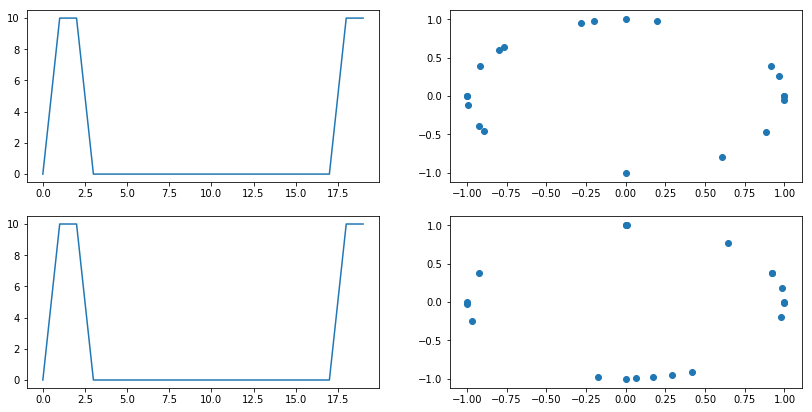

In [34]:
def faza(con):
    x=[]
    y=[]
    for c in con:
        a=angle(c, deg=False)
        x.append(cos(a))
        y.append(sin(a))
    return x, y

w = 20
TW = 1.0/w 
T=1

t = np.arange(0, T, TW)

freqs = range(int(len(t)))

f = lambda t : (sin(2*pi*t)+sin(4*pi*t))  
x1 = f(t) 

y1=fft(x1)
f1=np.fft.fft(x1)
r1, i1=faza(f1)

x2=(sin(2*pi*t)+cos(4*pi*t))
y2=fft(x2)
f2=np.fft.fft(x2)
r2, i2=faza(f2)

fig = plt.figure(1, figsize=(size, height * size))
sub = fig.add_subplot(2, 2, 1)
sub.plot(freqs, abs(y1))

sub = fig.add_subplot(2, 2, 2)
sub.scatter(i1, r1)

sub = fig.add_subplot(2, 2, 3)
sub.plot(freqs, abs(y2))

sub = fig.add_subplot(2, 2, 4)
sub.scatter(i2, r2)



# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element


dominujące
905
906
1207
1208


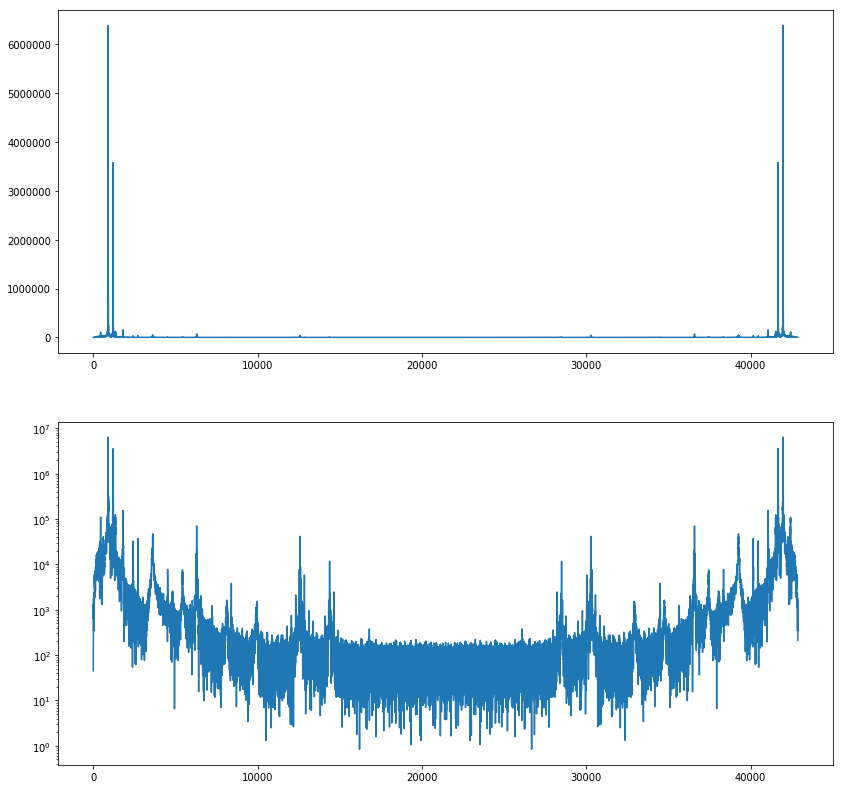

In [81]:
import scipy.io.wavfile
w, signal = scipy.io.wavfile.read('err.wav')

sig = [s[0] for s in signal] #Tylko pierwszy kanał

f=fft(sig)

fig = plt.figure(1, figsize=(size, height * size*2))
sub = fig.add_subplot(2, 1, 1)
sub.plot(abs(f))

sub = fig.add_subplot(2, 1, 2)
sub.set_yscale('log')
sub.plot(abs(f))

q=0
print('dominujące')
for i in f:
    if i < 1000000:
        f[q]=0
    elif q<=len(f)/2:
        print(q)
    q=q+1
